# Milestone 1 Phase 2 

## `1. Perkenalan`

**Nama   : Andika Atmanegara Putra**

**Batch  : FTDS - RMT - 019**

`Problem Statement` : 
Dengan menggunakan dataset yang disediakan, lakukan pemodelan untuk memprediksi apakah customer dengan kategori-kategori tertentu akan berhenti memakai produk perusahaan.

`Objective` : 
Mempersiapkan dataset dengan preprocessing, melakukan explorasi dataset, menganalisa dan mengimplementasikan Artificial Neural Network untuk memprediksi perilaku customer, kemudian melakukan improvement pada model yang telah dibuat.

`Metode Background`: Pada pembuatan model ini akan dilakukan dengan 2 cara yaitu sequential API dan Functional API. Dari 2 cara tersebut akan dicari beberapa metric seperti accuracy, precition, recall, dan f1-score. Kemudian model akan diimprove pada masing-masing sequential dan functional API dan dibandingkan antara sebelum dilakukan improve dan sesudah improve untuk keempat metric diatas. 

Fokus penilaian metric berada pada hasil recall yang semakin meningkat. namun tidak menutup kemungkinan adanya improve performa model diluar 4 metric diatas seperti waktu train model yang lebih singkat. Setelah 2 cara ANN dilakukan, akan dipilih model yang memiliki recall terbaik namun tidak sepenuhnya mengorbankan nilai metric yang lainnya.

## `2. Import Libraries`

In [1]:
# basic
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from feature_engine.outliers import Winsorizer
from sklearn.metrics import classification_report


# tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate, Dropout

# Correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from scipy.stats import chi2_contingency

# Evaluation
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

# save model
import joblib
import pickle
import json

# other
import warnings
warnings.filterwarnings('ignore')



## `3. Data Loading`

In [2]:
# baca dataset
data = pd.read_csv('churn.csv')

# tampilkan seluruh kolom
pd.set_option('display.max_columns', None)

data.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [3]:
data.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

Total keseluruhan data adalah sebanyak 37.010 entries data dengan 22 kolom data.

In [5]:
# cek duplikasi data
duplicate_rows = data[data.duplicated(keep=False)]
duplicate_rows

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
1035,854f5d6d5d9204d3,55,F,Town,Premium Membership,2015-08-07,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,12:07:52,8,1465.940000,73063.54,18.0,838.900000,Yes,Yes,No,Not Applicable,User Friendly Website,0
1546,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,12:47:12,16,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
3321,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,12:47:12,16,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
7062,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,18:16:03,8,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
7547,b36a10c24eab4cb0,44,M,Town,Silver Membership,2016-06-29,Yes,Gift Vouchers/Coupons,Smartphone,Wi-Fi,19:17:31,10,805.150000,45635.76,24.0,701.860000,No,Yes,Yes,No Information Available,Poor Customer Service,0
8807,930b39d136f072e3,56,M,Town,Premium Membership,2015-09-18,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,17:05:33,18,150.620000,23164.44,16.0,775.190000,Yes,No,Yes,Solved,Poor Product Quality,0
9092,9d20f093164c98a3,35,M,NaN,Platinum Membership,2016-06-08,No,Gift Vouchers/Coupons,Both,Fiber_Optic,17:58:45,4,228.570000,77844.85,14.0,714.280000,No,Yes,No,Not Applicable,User Friendly Website,0
9248,8f39faa74b6607e7,26,F,City,Premium Membership,2015-10-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,17:33:22,-999,116.140000,26377.39,0.0,710.310000,Yes,No,Yes,Solved,No reason specified,0
9505,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,18:16:03,8,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
9856,b1074e2baf6845ce,17,M,City,Platinum Membership,2015-09-06,NaN,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,01:36:55,25,40.950000,8759.38,29.0,713.060000,No,Yes,Yes,Unsolved,Poor Customer Service,0


In [6]:
duplicate_count = duplicate_rows.shape[0]
print("Jumlah baris data yang terduplikasi:", duplicate_count)

Jumlah baris data yang terduplikasi: 36


Dari hasil diatas, sebesar 36 baris data yang terindikasi duplikat tidak akan dihapus karena data tersebut tidak termasuk dalam duplikasi data. Dari kolom lain terlihat data-data tersebut merupakan data yang berbeda.

In [7]:
# backup dataset raw
data_clean = data.copy()

In [8]:
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

## `4. Exploratory Data Analysis`

In [10]:
# buat fungsi untuk get unique values tiap kolom 
def get_unique_values(data):
    unique_values_dict = {}
    for column in data.columns:
        unique_values = data[column].unique()
        unique_values_dict[column] = ", ".join(str(val) for val in unique_values)
    return unique_values_dict

unique_values = get_unique_values(data)

# Konversi kamus menjadi DataFrame
df_unique_values = pd.DataFrame.from_dict(unique_values, orient='index', columns=['Unique Values'])

# Tampilkan DataFrame
print(df_unique_values)


                                                                  Unique Values
user_id                       9f420209e7d129f3, ac6e97806267549e, a6aa19b158...
age                           29, 50, 26, 63, 64, 35, 43, 15, 49, 53, 33, 24...
gender                                                                F, M, nan
region_category                                        nan, City, Village, Town
membership_category           No Membership, Basic Membership, Silver Member...
joining_date                  2017-04-05, 2017-03-31, 2017-02-11, 2015-12-23...
joined_through_referral                                            Yes, nan, No
preferred_offer_types         Without Offers, Credit/Debit Card Offers, Gift...
medium_of_operation                              nan, Desktop, Smartphone, Both
internet_option                                 Wi-Fi, Fiber_Optic, Mobile_Data
last_visit_time               22:29:49, 15:44:56, 20:31:53, 14:28:05, 04:16:...
days_since_last_login         4, 11, 8, 

### Visualisasi

- Distribusi target 'churn_risk_score' 

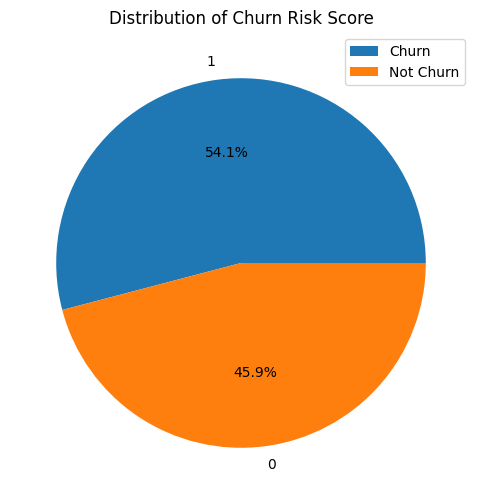

In [11]:
churn_count = data['churn_risk_score'].value_counts()

# buat plot
plt.figure(figsize=(7,6))
plt.pie(churn_count.values, labels=churn_count.index, autopct='%1.1f%%')
plt.title('Distribution of Churn Risk Score')
plt.legend(['Churn','Not Churn'], loc='upper right')
plt.show()

Berdasarkan grafik distribusi churn, terlihat bahwa persebaran data cenderung terbagi sama besar antar nilainya atau bisa dikatakan bahwa distribusi `churn risk score` cenderung normal.

* Perbandingan Churn Risk Score dengan Average Transaction

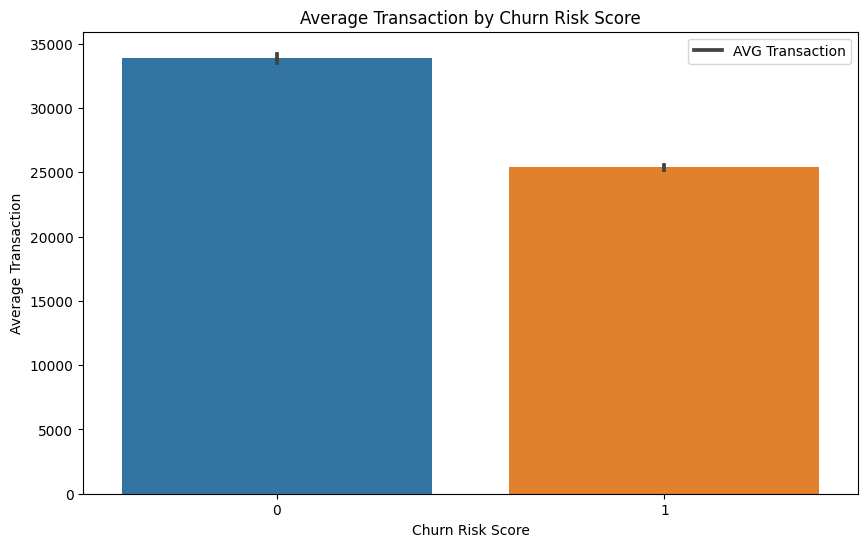

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='churn_risk_score', y='avg_transaction_value', data=data)
plt.xlabel('Churn Risk Score')
plt.ylabel('Average Transaction')
plt.title('Average Transaction by Churn Risk Score')
plt.legend(['AVG Transaction'])
plt.show()

Chart **"Average Transaction by Churn Risk Score"** menampilkan rata-rata transaksi antara customer yang churn(1) dengan yang tidak churn(0). Untuk customer yang tidak churn menampilkan rata-rata transaksi yang lebih tinggi dibandingkan dengan customer churn. Maka dapat disimpulkan sementara bahwa mayoritas customer tidak akan churn berdasarkan 2 tabel diatas.

* Distribusi Membership Category dibandingkan Churn Risk Score

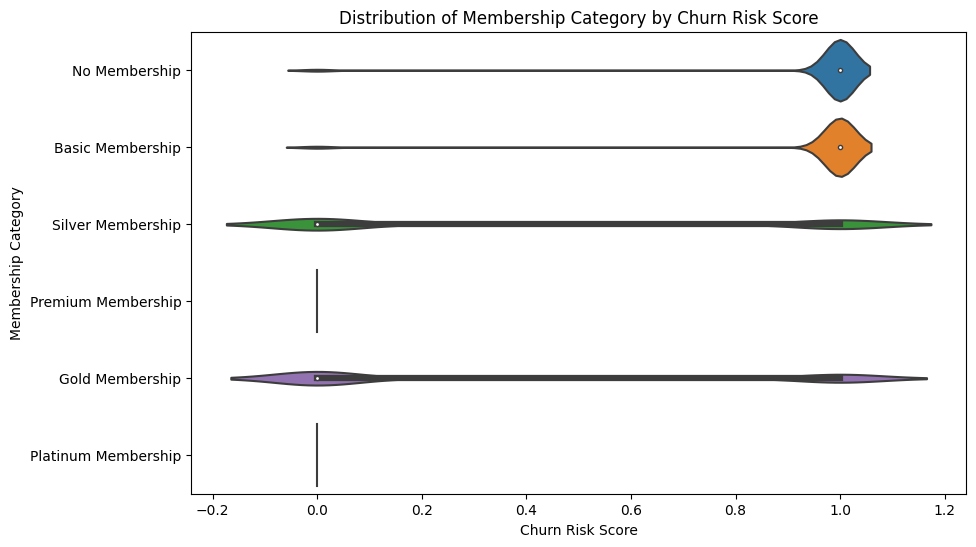

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['churn_risk_score'], y=data['membership_category'])
plt.xlabel('Churn Risk Score')
plt.ylabel('Membership Category')
plt.title('Distribution of Membership Category by Churn Risk Score')
plt.show()


Grafik distribusi kategori membership memperlihatkan bahwa untuk customer yang sudah churn mayoritas berada pada kategori membership: `No Membership` dan `Basic Membership`. Sedangkan hanya sebagian kecil saja customer dari kategori lainnya seperti Silver membership dan Gold membership saja yang churn. 

* Distribusi Feedback dibandingkan Churn Risk Score

In [14]:
# feedback
feedback = data.groupby(['churn_risk_score','feedback']).aggregate(Number_of_customer=('feedback','count')).reset_index()
feedback

,churn_risk_score,feedback,Number_of_customer
0,0,No reason specified,2300
1,0,Poor Customer Service,2262
2,0,Poor Product Quality,2226
3,0,Poor Website,2309
4,0,Products always in Stock,1382
5,0,Quality Customer Care,1360
6,0,Reasonable Price,1417
7,0,Too many ads,2343
8,0,User Friendly Website,1393
9,1,No reason specified,3995


In [15]:
# plotting bar plot
fig = px.bar(feedback, x="feedback", y="Number_of_customer",color='churn_risk_score',color_discrete_sequence=['red','blue'],
             orientation="v",hover_name="feedback"        
                
             )
fig.update_layout(title_text = "Number of Customers Based on Their Feedback")
fig.show()

Jika dilihat antara jumlah feedback terhadap churn risk score menampilkan bahwa alasan customer churn mayoritas berada pada feedback seperti: `No reason specified`, `Poor Customer Service`, `Poor Product Quality`, `Poor Website`, `Too many ads`. Terlihat bahwa alasan customer churn berada di layanan after sales atau customer based service di perusahaan ini. Hal ini juga berlaku pada customer yang tidak churn yang mengeluhkan hal yang sama namun jumlahnya tidak sebanyak customer churn.

- Korelasi antar feature

In [16]:
# kategorikan data berdasarkan tipe data
num_data = data_clean.select_dtypes(include=np.number).columns.tolist()
cat_data = data_clean.select_dtypes(include=['object']).columns.tolist()

print('Numerical Data: ', num_data)
print('Categorical Data: ', cat_data)

Numerical Data:  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
Categorical Data:  ['user_id', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [17]:
# conversi data categorical ke numerical 
cat_LabeEncoder = LabelEncoder()

for col in data[cat_data]:
    data_clean[col] = cat_LabeEncoder.fit_transform(data_clean[col])

data.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


<Axes: >

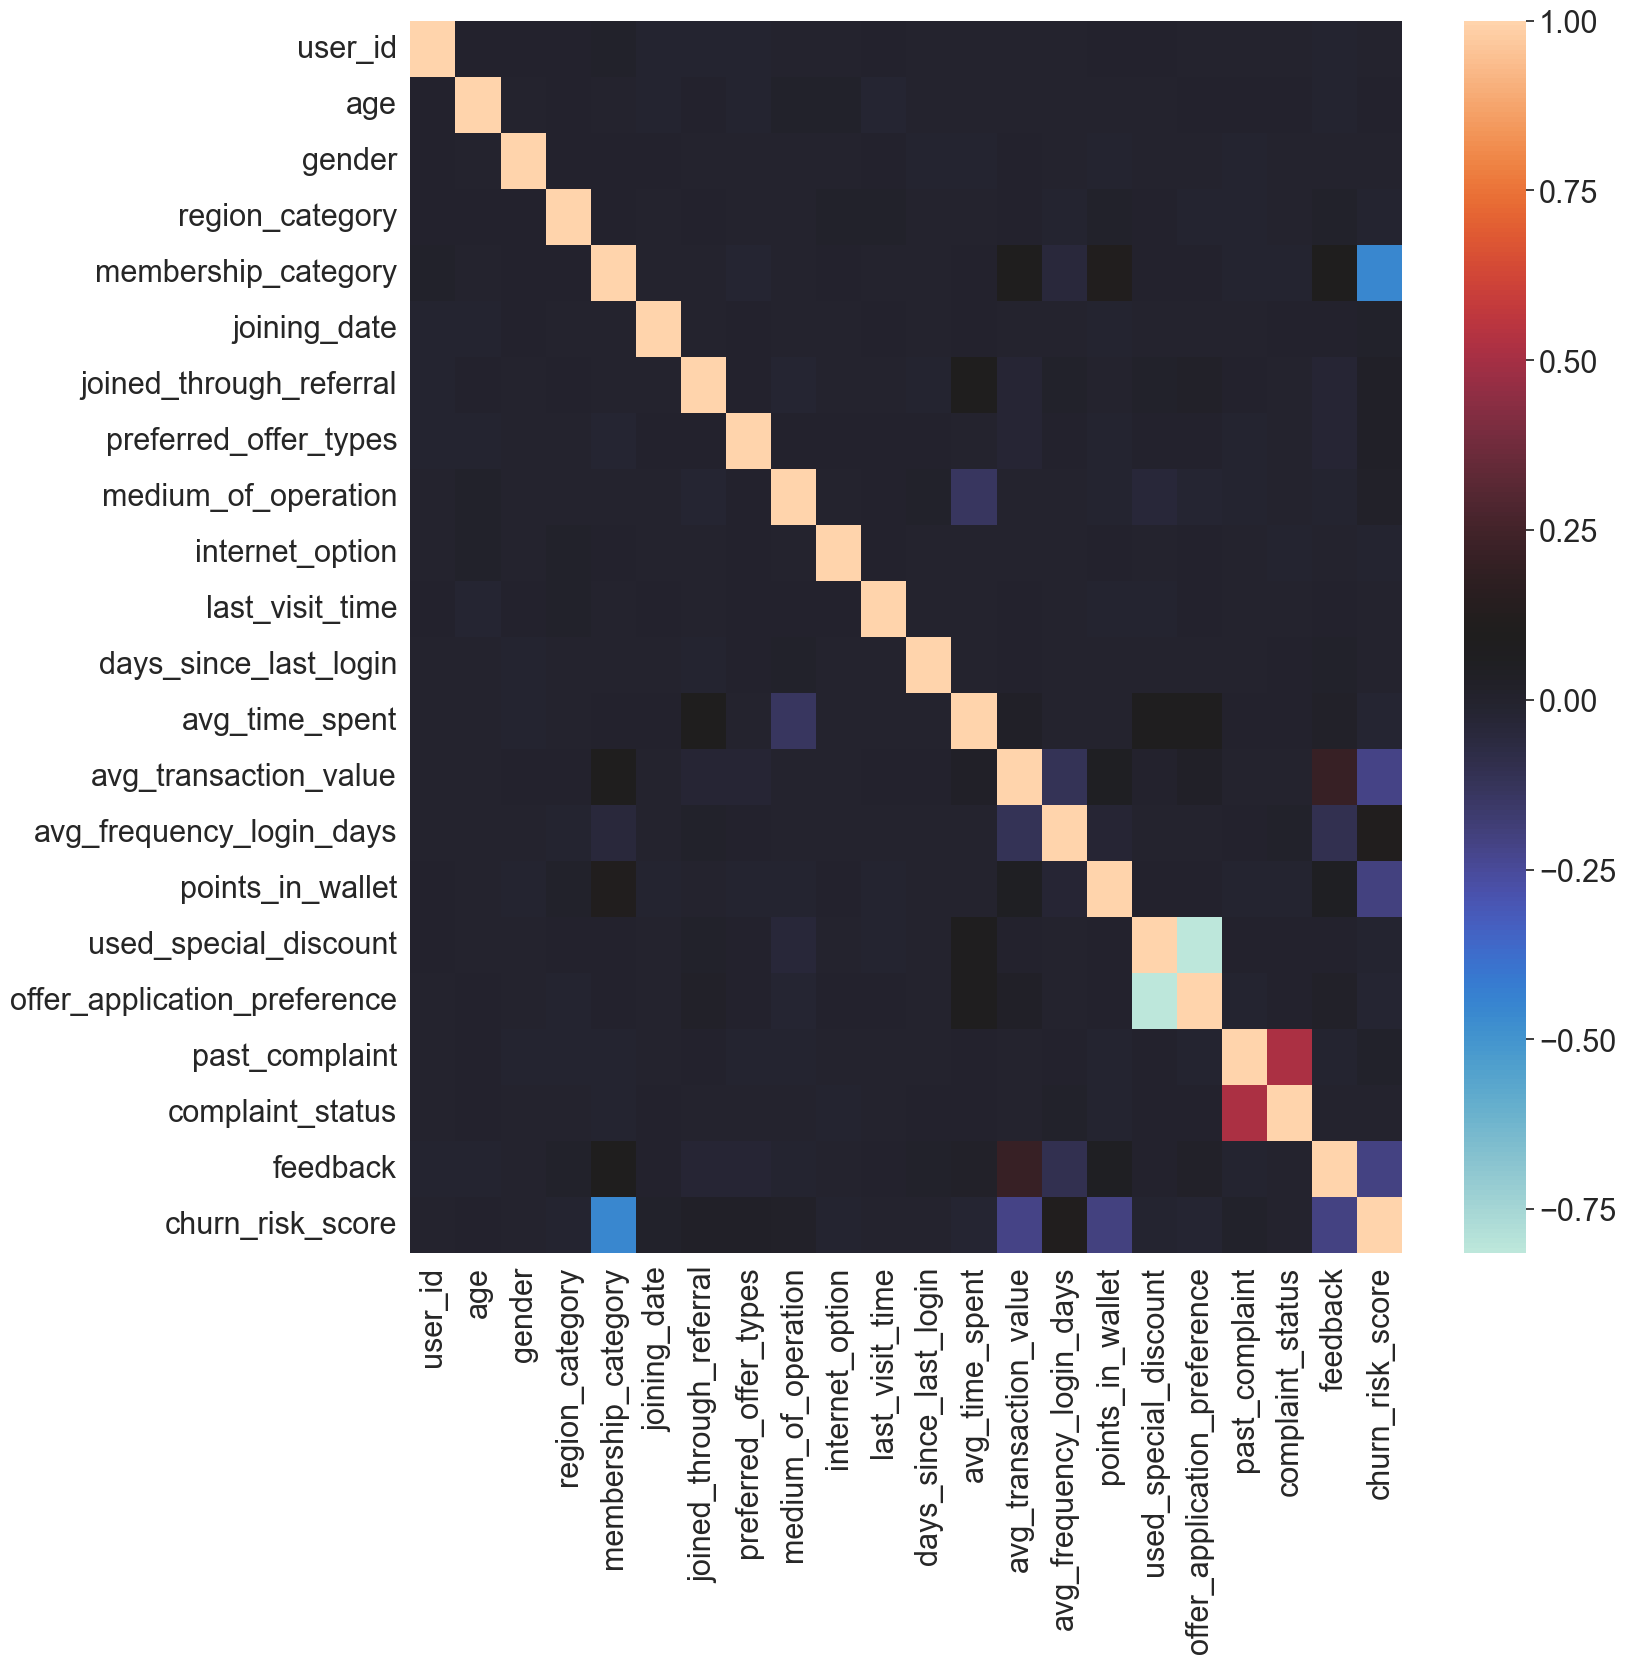

In [18]:
sns.set(font_scale=2)
plt.figure(figsize=(16,16))
sns.heatmap(data_clean.corr(), annot=False, cmap='icefire', fmt='.2f')

Tabel diatas menunjukkan, korelasi antar feature(kolom) yang bisa saja berakibat pada churn atau tidaknya seorang customer. Grafik tersebut menunjukkan bahwa: `pass_complaint`, `complaint_status`, `point_in_wallet`, `avg_frequency_login_days`, `avg_transaction_value`, `membership_category` memiliki suatu korelasi. Untuk analisa kedepannya akan diuji pada feature tersebut. 

## `5. Feature Engineering`

### 5.1. Drop Feature

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

* Drop 3 feature

In [20]:

data = data.drop(['user_id', 'joining_date', 'last_visit_time'], axis=1)

Hal ini dilakukan, karena 3 feature ini dianggap tidak memiliki hubungan kuat sebagai penentu prediksi churn-tidaknya customer kedepan. 

In [21]:
#cleaning nilai negatif
data.replace(-999, np.nan, inplace=True)

### 5.2. Split Feature and Target

In [22]:
X = data.drop(['churn_risk_score'], axis=1)
y = data['churn_risk_score']

### 5.3. Split Numerical and Categorical

In [23]:
num_columns = X.select_dtypes(include=np.number).columns.tolist()

In [24]:
cat1_columns = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 
                'internet_option','used_special_discount', 'offer_application_preference', 'past_complaint']

cat2_columns = ['complaint_status', 'feedback']

### 5.4. Split Train, Test, and Validation

In [25]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.15, random_state=69, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=69, stratify=y_train_val)

print('Train Size: ', X_train.shape)
print('Val Size: ', X_val.shape)
print('Test Size: ', X_test.shape)

Train Size:  (26739, 18)
Val Size:  (4719, 18)
Test Size:  (5552, 18)


### 5.5. Missing Values

In [26]:
X_train.isnull().sum()

age                                0
gender                            41
region_category                 3970
membership_category                0
joined_through_referral         3955
preferred_offer_types            198
medium_of_operation             3919
internet_option                    0
days_since_last_login           1429
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [27]:
X_test.isnull().sum()

age                               0
gender                            8
region_category                 774
membership_category               0
joined_through_referral         803
preferred_offer_types            38
medium_of_operation             791
internet_option                   0
days_since_last_login           312
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [28]:
X_train_val.isnull().sum()

age                                0
gender                            51
region_category                 4657
membership_category                0
joined_through_referral         4639
preferred_offer_types            250
medium_of_operation             4604
internet_option                    0
days_since_last_login           1689
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

Missing Values akan di handling pada proses pipeline.

### 5.6. Outliers

In [29]:
def plots(df):
    num_cols = len(df.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4*num_rows))
    
    for i, column in enumerate(df.columns):
        row = i // 2
        col = i % 2
        
        ax = axes[row, col]
        sns.boxplot(df[column], ax=ax)
        ax.set_title('Boxplot of ' + column)
        
        skewness = df[column].skew()
        ax.text(0.5, 0.65, f'Skewness: {skewness:.2f}', transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='top',
                bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.8})
    
    plt.tight_layout()
    plt.show()

In [30]:
# reset_index
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

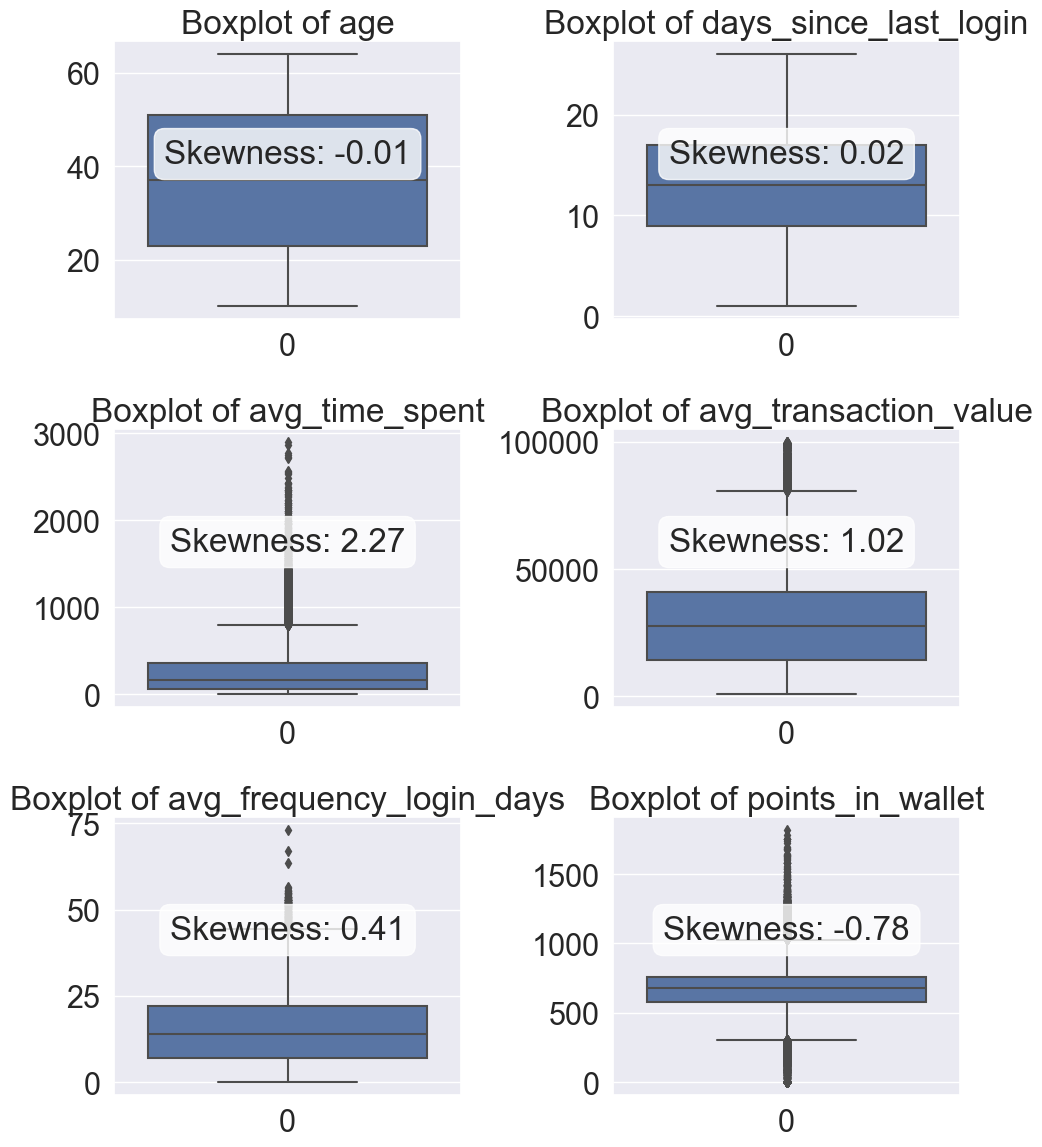

In [31]:
# Menampilkan boxplot
plots(X_train[['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']])

Grafik boxplot diatas menampilkan 6 feature yang memiliki outlier di masing-masing kolomnya, dengan feature avg_time_spent yang memiliki nilai skew terbesar yaitu 2,27. Untuk handlingnya akan dilakukan pada proses pipeline.

### 5.7. Pipeline

#### 5.7.1 Pipeline Scikit-Learn

* Define pipeline

In [32]:
# handling missing values dan outlier pada feature numerical
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), #
                     ('outlier', Winsorizer(capping_method='iqr', fold=1.5, tail='both')),
                     ('scaler', MinMaxScaler())])

In [33]:
# encoding pada feature categorical_1
cat1_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                      ('ord_enc', OrdinalEncoder(categories=[['M', 'F'], ['Village', 'Town', 'City'], 
                                                             ['No Membership', 'Basic Membership', 'Silver Membership', 'Gold Membership', 'Platinum Membership', 
                                                              'Premium Membership'],
                                                             ['No', 'Yes'], ['Without Offers', 'Credit/Debit Card Offers', 'Gift Vouchers/Coupons'],
                                                             ['Smartphone', 'Desktop', 'Both'], ['Mobile_Data', 'Wi-Fi', 'Fiber_Optic'],
                                                             ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes']]))])

In [34]:
# encoding dan missing values dengan modus pada feature categorical_2
cat2_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                      ('ohe_enc', OneHotEncoder(sparse=False))])

In [35]:
full_pipeline = ColumnTransformer([('num', num_pipe, num_columns),
                                   ('ord_enc', cat1_pipe, cat1_columns),
                                   ('ohe_enc', cat2_pipe, cat2_columns)])

In [36]:
# mentransformasikan data pada X_train, X_val, dan X_test
X_train = full_pipeline.fit_transform(X_train)
X_val = full_pipeline.transform(X_val)
X_test = full_pipeline.transform(X_test)

#### 5.7.2 Pipeline Tensorflow

In [37]:
#  membuat objek dataset dari X_train, y_train
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(473).repeat(10).prefetch(tf.data.AUTOTUNE)

val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(473)

test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(473)

#### 5.7.3. Feature Selection

In [38]:
X_train

array([[0.77777778, 0.76      , 0.41478574, ..., 0.        , 1.        ,
        0.        ],
       [0.7037037 , 0.32      , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.35185185, 0.64      , 0.32567122, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.25925926, 0.56      , 0.23298357, ..., 0.        , 0.        ,
        0.        ],
       [0.31481481, 0.8       , 0.1880929 , ..., 0.        , 0.        ,
        0.        ],
       [0.83333333, 0.88      , 0.82970987, ..., 0.        , 1.        ,
        0.        ]])

## `6. Model`

### `6.1. Sequential API`

#### 6.1.1. Definition

In [39]:
# clear session
seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [40]:
X_train.shape

(26739, 30)

In [41]:
# Metric yang dipantau
acc = tf.keras.metrics.BinaryAccuracy()
prec = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()

# Create sequential API
model_sequential = Sequential()

# hidden layer 1
model_sequential.add(Dense(16, activation='relu',
                           kernel_initializer= tf.keras.initializers.HeNormal(seed),
                           input_shape=(30,)))

# hideen layer 2
model_sequential.add(Dense(8,
                           activation='relu',
                           kernel_initializer= tf.keras.initializers.HeNormal(seed)))

# otuput layer
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer= tf.keras.initializers.GlorotNormal(seed)))

# compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=[acc,prec,rec])

model_sequential.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


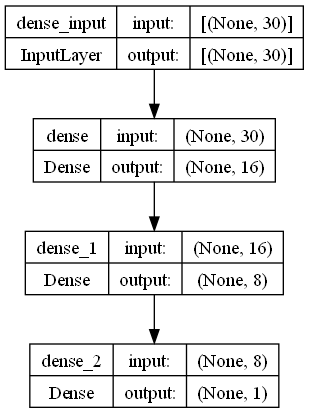

In [42]:
# plot layers
tf.keras.utils.plot_model(model_sequential, show_shapes=True)

#### 6.1.2. Training

In [43]:
#define callback
early_callbacks = tf.keras.callbacks.EarlyStopping(monitor='recall', patience=4, restore_best_weights=True)


In [44]:
# train data dengan sequential
%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=150,
                                   validation_data=(val_pipe),
                                   callbacks= early_callbacks)

Epoch 1/150
570/570 [==============================] - 3s 2ms/step - loss: 0.3354 - binary_accuracy: 0.8370 - precision: 0.8423 - recall: 0.8596 - val_loss: 0.3020 - val_binary_accuracy: 0.8360 - val_precision: 0.8337 - val_recall: 0.8703
Epoch 2/150
570/570 [==============================] - 1s 1ms/step - loss: 0.2821 - binary_accuracy: 0.8489 - precision: 0.8499 - recall: 0.8752 - val_loss: 0.2991 - val_binary_accuracy: 0.8353 - val_precision: 0.8288 - val_recall: 0.8766
Epoch 3/150
570/570 [==============================] - 1s 1ms/step - loss: 0.2784 - binary_accuracy: 0.8487 - precision: 0.8482 - recall: 0.8774 - val_loss: 0.2958 - val_binary_accuracy: 0.8356 - val_precision: 0.8274 - val_recall: 0.8793
Epoch 4/150
570/570 [==============================] - 1s 1ms/step - loss: 0.2723 - binary_accuracy: 0.8491 - precision: 0.8479 - recall: 0.8787 - val_loss: 0.2861 - val_binary_accuracy: 0.8343 - val_precision: 0.8254 - val_recall: 0.8797
Epoch 5/150
570/570 [=======================

#### 6.1.3. Create Dataframe

In [45]:
# create dataframe
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,binary_accuracy,precision,recall,val_loss,val_binary_accuracy,val_precision,val_recall
0,0.335379,0.836991,0.842307,0.859552,0.301964,0.835982,0.833709,0.870298
1,0.282076,0.848876,0.849902,0.875164,0.299058,0.835346,0.828825,0.876567
2,0.278434,0.848734,0.848189,0.877377,0.295767,0.835558,0.827434,0.879310
3,0.272346,0.849134,0.847888,0.878725,0.286087,0.834287,0.825368,0.879702
4,0.263631,0.850226,0.849235,0.879181,0.276612,0.833651,0.823035,0.882053


### `6.2. Functional API`

#### 6.2.1 Definition

In [46]:
# clear session
seed = 50

tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [47]:
# Metric yang dipantau
acc = tf.keras.metrics.BinaryAccuracy()
prec = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()

# create functional model
input_layer = Input(shape=(30,))

# create hidden layer 1
hidden_layer_1 = Dense(16, activation='relu', \
    kernel_initializer= tf.keras.initializers.HeNormal(seed))(input_layer)

# create hidden layer 2
hidden_layer_2 = Dense(8, activation='relu', \
    kernel_initializer= tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

# merge layer
concat_layer = concatenate([input_layer, hidden_layer_2])

# output layer
output_layer = Dense(1, activation='sigmoid', \
    kernel_initializer= tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional = Model(inputs = input_layer, outputs = output_layer)

# compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=[acc,prec,rec])

model_functional.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           496         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            136         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

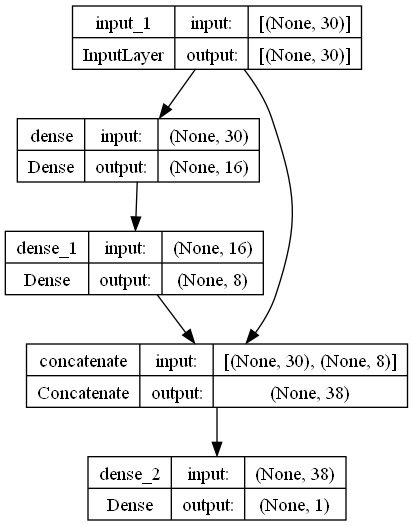

In [48]:
# plot layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

#### 6.2.2. Functional API - Model Training

In [49]:
# train model dengan functional API
%%time
history_func = model_functional.fit(train_pipe,
                                    epochs=150,
                                    validation_data=(val_pipe),
                                    callbacks=early_callbacks)

Epoch 1/150
570/570 [==============================] - 2s 2ms/step - loss: 0.3349 - binary_accuracy: 0.8334 - precision: 0.8598 - recall: 0.8269 - val_loss: 0.3014 - val_binary_accuracy: 0.8366 - val_precision: 0.8341 - val_recall: 0.8711
Epoch 2/150
570/570 [==============================] - 1s 1ms/step - loss: 0.2807 - binary_accuracy: 0.8491 - precision: 0.8512 - recall: 0.8739 - val_loss: 0.2981 - val_binary_accuracy: 0.8351 - val_precision: 0.8295 - val_recall: 0.8750
Epoch 3/150
570/570 [==============================] - 1s 1ms/step - loss: 0.2742 - binary_accuracy: 0.8494 - precision: 0.8507 - recall: 0.8752 - val_loss: 0.2879 - val_binary_accuracy: 0.8345 - val_precision: 0.8271 - val_recall: 0.8774
Epoch 4/150
570/570 [==============================] - 1s 1ms/step - loss: 0.2622 - binary_accuracy: 0.8507 - precision: 0.8523 - recall: 0.8758 - val_loss: 0.2732 - val_binary_accuracy: 0.8379 - val_precision: 0.8296 - val_recall: 0.8813
Epoch 5/150
570/570 [=======================

#### 6.2.3. Functional API - Model Evaluation

In [50]:
# create dataframe
history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,binary_accuracy,precision,recall,val_loss,val_binary_accuracy,val_precision,val_recall
0,0.334935,0.833438,0.859796,0.826903,0.301363,0.836618,0.834146,0.871082
1,0.280725,0.849134,0.851192,0.873851,0.298115,0.835135,0.829495,0.875000
2,0.274188,0.849407,0.850666,0.875233,0.287859,0.834499,0.827115,0.877351
3,0.262166,0.850720,0.852278,0.875814,0.273214,0.837889,0.829583,0.881270
4,0.250052,0.871368,0.875949,0.887935,0.260844,0.872431,0.849212,0.929075


### `6.3. Model Improvement`

#### 6.3.1. Improvement Sequential API

Pada improvement sequential, saya menggunakan Dropout dan Nadam optimizer untuk meningkatkan performa model terutama di metric Recall. 

In [51]:
# model definition
new_seqModel = Sequential()

# hidden layer 1
new_seqModel.add(Dense(8,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed),
                       input_shape=(30,))) 
# add dropout to improve model
new_seqModel.add(tf.keras.layers.Dropout(rate=0.1)) 

# hidden layer 2
new_seqModel.add(Dense(4,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed)))

new_seqModel.add(tf.keras.layers.Dropout(rate=0.1))

# Output layer
new_seqModel.add(Dense(1,
                       activation='sigmoid',
                       kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

# compile
new_seqModel.compile(loss='binary_crossentropy',
                     optimizer='Nadam',
                     metrics=[tf.keras.metrics.BinaryAccuracy(),
                              tf.keras.metrics.Precision(),
                              tf.keras.metrics.Recall()])

new_seqModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 248       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


Alasan digunakannya,
- dropout: Dropout secara acak mengnonaktifkan sebagian unit (neuron) pada lapisan sebelumnya selama train. Akibatnya dapat memperbaiki generalisasi model dan mengurangi overfit.

- Nadam Optimizer: Optimizer ini menggabungkan metode momentum untuk mempercepat konvergensi dengan algoritma Adam yang efisien dalam menyesuaikan learning rate secara adaptif. Dengan menggunakan Nadam, optimasi model dapat dilakukan dengan lebih cepat dan efisien, serta memungkinkan model mencapai titik optimum yang lebih baik

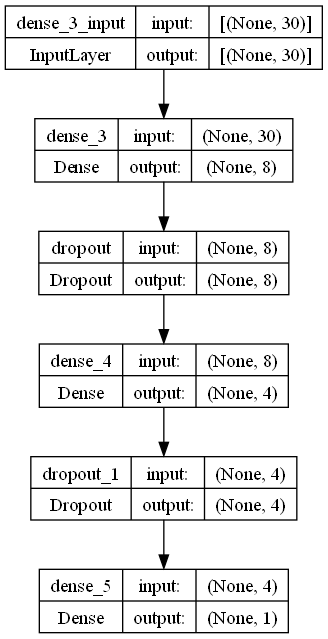

In [52]:
# plot layers

tf.keras.utils.plot_model(new_seqModel, show_shapes=True)

In [53]:
# train model improvement sequential API
%%time
# use callback to improve model 
history_new_seq = new_seqModel.fit(train_pipe,
                                   epochs=150,
                                   validation_data=(val_pipe),
                                   callbacks=early_callbacks)

Epoch 1/150
570/570 [==============================] - 3s 2ms/step - loss: 0.4413 - binary_accuracy: 0.7727 - precision_1: 0.7901 - recall_1: 0.7895 - val_loss: 0.3174 - val_binary_accuracy: 0.8379 - val_precision_1: 0.8494 - val_recall_1: 0.8511
Epoch 2/150
570/570 [==============================] - 1s 2ms/step - loss: 0.3292 - binary_accuracy: 0.8360 - precision_1: 0.8267 - recall_1: 0.8816 - val_loss: 0.2894 - val_binary_accuracy: 0.8360 - val_precision_1: 0.8177 - val_recall_1: 0.8966
Epoch 3/150
570/570 [==============================] - 1s 2ms/step - loss: 0.3077 - binary_accuracy: 0.8428 - precision_1: 0.8174 - recall_1: 0.9135 - val_loss: 0.2785 - val_binary_accuracy: 0.8389 - val_precision_1: 0.8054 - val_recall_1: 0.9259
Epoch 4/150
570/570 [==============================] - 1s 2ms/step - loss: 0.2969 - binary_accuracy: 0.8476 - precision_1: 0.8183 - recall_1: 0.9233 - val_loss: 0.2699 - val_binary_accuracy: 0.8521 - val_precision_1: 0.8145 - val_recall_1: 0.9408
Epoch 5/150


In [54]:
# create dataframe
history_new_seq_df = pd.DataFrame(history_new_seq.history)
history_new_seq_df

,loss,binary_accuracy,precision_1,recall_1,val_loss,val_binary_accuracy,val_precision_1,val_recall_1
0,0.441284,0.772695,0.790128,0.789456,0.317358,0.837889,0.849433,0.851097
1,0.329190,0.835996,0.826695,0.881608,0.289408,0.835982,0.817727,0.896552
2,0.307749,0.842803,0.817369,0.913483,0.278464,0.838949,0.805385,0.925940
3,0.296882,0.847627,0.818295,0.923322,0.269919,0.852087,0.814451,0.940831
4,0.284799,0.865836,0.861061,0.896640,0.265048,0.867133,0.824402,0.958464
...,...,...,...,...,...,...,...,...
145,0.229682,0.905767,0.900957,0.927774,0.203748,0.918203,0.897869,0.957680
146,0.229510,0.905916,0.901199,0.927774,0.204569,0.919051,0.898019,0.959248
147,0.229786,0.906118,0.901084,0.928341,0.206029,0.917779,0.892029,0.964734
148,0.229641,0.906313,0.900828,0.929074,0.205881,0.917991,0.892922,0.963950


#### 6.3.2. Improvement Functional API

Pada improvement sequential, saya menggunakan Dropout dan Nadam optimizer untuk meningkatkan performa model terutama di metric Recall. 

In [55]:
# input layer
input_layer = Input(shape=(30,))

# hidden layer
hidden_layer_1 = Dense(8,
                       activation='relu',
                       kernel_initializer= tf.keras.initializers.HeNormal(seed))(input_layer)

# tambahkan dropout
Dropout1 = Dropout(rate=0.1)(hidden_layer_1 )

# hidden layer 2
hidden_layer_2 = Dense(4,
                       activation='relu',
                       kernel_initializer= tf.keras.initializers.HeNormal(seed))(Dropout1)

# tambahkan dropout 2
Dropout2 = Dropout(rate=0.1)(hidden_layer_2)

# concat layer
concat_layer = concatenate([input_layer, Dropout2])

# output layer
output_layer = Dense(1, activation='sigmoid',
                     kernel_initializer= tf.keras.initializers.GlorotNormal(seed))(concat_layer)

# define model
new_funcModel = Model(inputs=input_layer, outputs=output_layer)

# compile
new_funcModel.compile(loss='binary_crossentropy',
                      optimizer='Nadam',
                      metrics=[tf.keras.metrics.BinaryAccuracy(),
                               tf.keras.metrics.Precision(),
                               tf.keras.metrics.Recall()])

new_funcModel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 8)            248         ['input_2[0][0]']                
                                                                                                  
 dropout_2 (Dropout)            (None, 8)            0           ['dense_6[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 4)            36          ['dropout_2[0][0]']              
                                                                                            

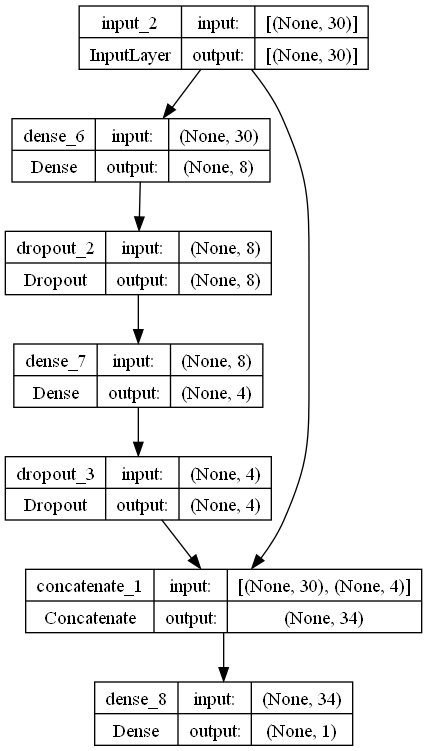

In [56]:
# plot layer
tf.keras.utils.plot_model(new_funcModel, show_shapes=True)

In [90]:
# train improved functional API 
%%time

# use a callback to improve model
history_new_func = new_funcModel.fit(train_pipe,
                                   epochs=150,
                                   validation_data=(val_pipe),
                                   callbacks=early_callbacks)


KeyboardInterrupt



In [58]:
# create dataframe
history_new_func_df = pd.DataFrame(history_new_func.history)
history_new_func_df

,loss,binary_accuracy,precision_2,recall_2,val_loss,val_binary_accuracy,val_precision_2,val_recall_2
0,0.407464,0.799323,0.854931,0.757533,0.317197,0.834499,0.834277,0.865987
1,0.311774,0.848846,0.864007,0.855148,0.305988,0.834287,0.834467,0.865204
2,0.300530,0.850787,0.865108,0.857906,0.300831,0.834287,0.835227,0.864028
3,0.293183,0.851157,0.863449,0.860983,0.297381,0.834499,0.836564,0.862461
4,0.288216,0.851741,0.862847,0.863092,0.294365,0.834287,0.836502,0.862069
...,...,...,...,...,...,...,...,...
145,0.204968,0.921265,0.929848,0.924158,0.193242,0.923501,0.928097,0.930643
146,0.205224,0.921377,0.929952,0.924262,0.193404,0.923925,0.925165,0.934953
147,0.205291,0.921201,0.929900,0.923972,0.193897,0.923077,0.923732,0.934953
148,0.205559,0.921190,0.930036,0.923792,0.194784,0.922865,0.922068,0.936520


## `7. Model Evaluation`

### 7.1. Sequential API

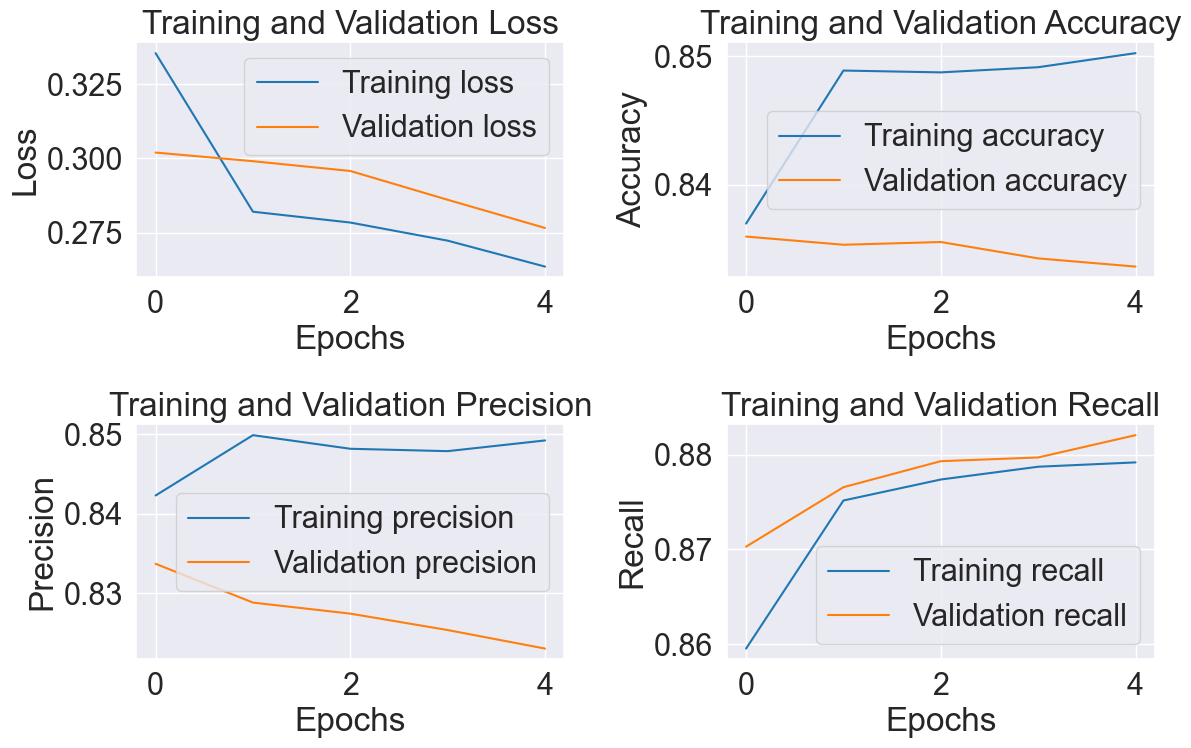

In [59]:
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
cmap= plt.get_cmap('tab10')

# Plot Training and Validation Loss
axs[0, 0].plot(history_seq_df['loss'], color=cmap(0), label='Training loss')
axs[0, 0].plot(history_seq_df['val_loss'], color=cmap(1), label='Validation loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc="best")

# Plot Training and Validation Accuracy
axs[0, 1].plot(history_seq_df['binary_accuracy'], color=cmap(0), label='Training accuracy')
axs[0, 1].plot(history_seq_df['val_binary_accuracy'], color=cmap(1), label='Validation accuracy')
axs[0, 1].set_title('Training and Validation Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot Training and Validation Precision
axs[1, 0].plot(history_seq_df['precision'], color=cmap(0), label='Training precision')
axs[1, 0].plot(history_seq_df['val_precision'], color=cmap(1), label='Validation precision')
axs[1, 0].set_title('Training and Validation Precision')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()

# Plot Training and Validation Recall
axs[1, 1].plot(history_seq_df['recall'], color=cmap(0), label='Training recall')
axs[1, 1].plot(history_seq_df['val_recall'], color=cmap(1), label='Validation recall')
axs[1, 1].set_title('Training and Validation Recall')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()

plt.tight_layout() 
plt.show()


12/12 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2549
           1       0.85      0.88      0.86      3003

    accuracy                           0.85      5552
   macro avg       0.85      0.85      0.85      5552
weighted avg       0.85      0.85      0.85      5552



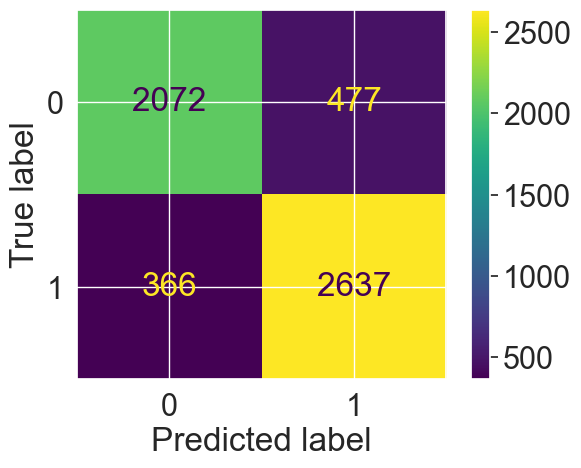

In [60]:
# Evaluasi model  of test set
y_pred_seq1 = model_sequential.predict(test_pipe)
y_pred_seq1 = np.where(y_pred_seq1 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq1))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_seq1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='viridis')
plt.show()

Data dengan pemodelan sequential API menunjukkan performa metric 

|precision | recall | f1-score |

| 85%      | 88%    | 86%      |

dari nilai diatas, model masih terbilang kurang baik namun menuju kearah yang baik jika dilakukan improvement di beberapa metode.

### 7.2. Functional API

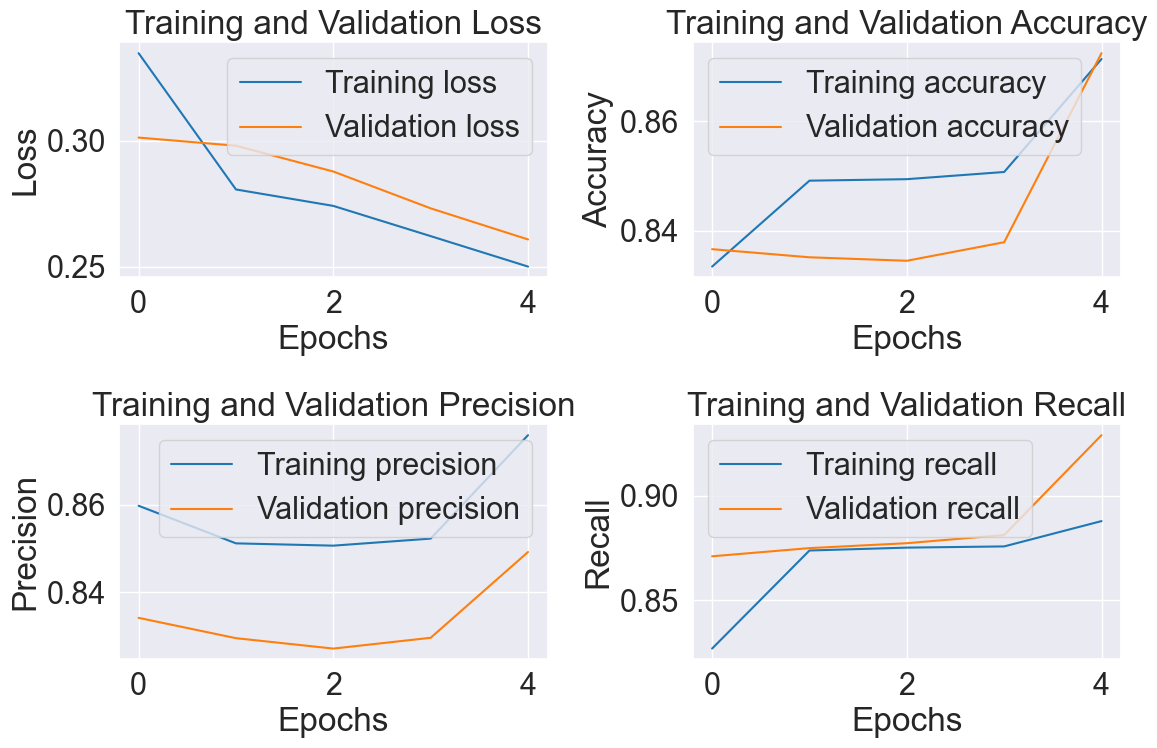

In [61]:
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
cmap= plt.get_cmap('tab10')

# Plot Training and Validation Loss
axs[0, 0].plot(history_func_df['loss'], color=cmap(0), label='Training loss')
axs[0, 0].plot(history_func_df['val_loss'], color=cmap(1), label='Validation loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc="best")

# Plot Training and Validation Accuracy
axs[0, 1].plot(history_func_df['binary_accuracy'], color=cmap(0), label='Training accuracy')
axs[0, 1].plot(history_func_df['val_binary_accuracy'], color=cmap(1), label='Validation accuracy')
axs[0, 1].set_title('Training and Validation Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot Training and Validation Precision
axs[1, 0].plot(history_func_df['precision'], color=cmap(0), label='Training precision')
axs[1, 0].plot(history_func_df['val_precision'], color=cmap(1), label='Validation precision')
axs[1, 0].set_title('Training and Validation Precision')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()

# Plot Training and Validation Recall
axs[1, 1].plot(history_func_df['recall'], color=cmap(0), label='Training recall')
axs[1, 1].plot(history_func_df['val_recall'], color=cmap(1), label='Validation recall')
axs[1, 1].set_title('Training and Validation Recall')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()

plt.tight_layout()  
plt.show()


12/12 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2549
           1       0.85      0.88      0.86      3003

    accuracy                           0.85      5552
   macro avg       0.85      0.85      0.85      5552
weighted avg       0.85      0.85      0.85      5552



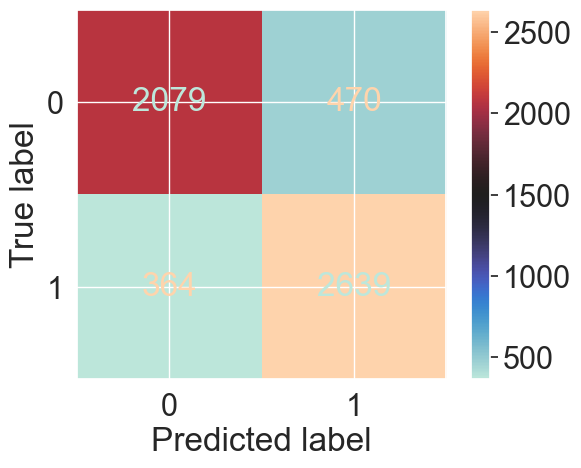

In [62]:
# Evaluasi model  of test set
y_pred_func_1 = model_functional.predict(test_pipe)
y_pred_func_1 = np.where(y_pred_func_1 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func_1))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_func_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='icefire')
plt.show()

Data dengan pemodelan functional API menunjukkan performa metric yang sama dengan sequential API, yaitu:

|precision | recall | f1-score |

| 85%      | 88%    | 86%      |

dari nilai diatas, model masih terbilang kurang baik namun menuju kearah yang baik jika dilakukan improvement di beberapa metode.

### 7.3. Improved Sequential API

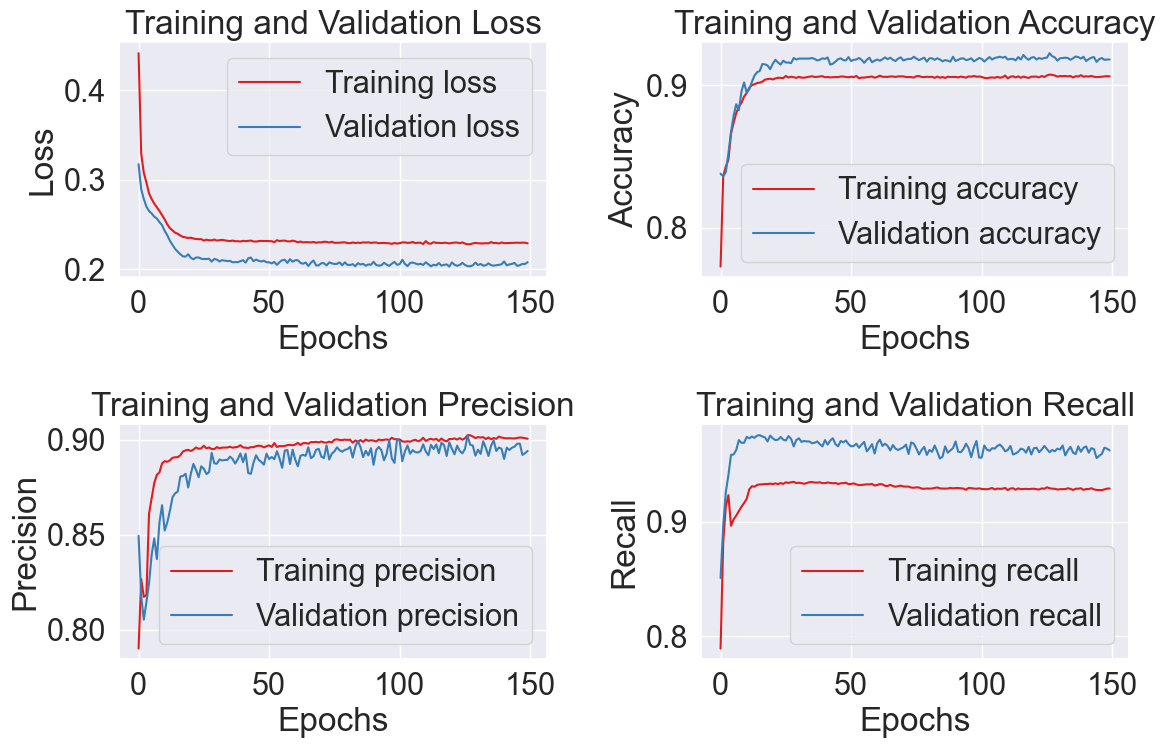

In [63]:
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
cmap= plt.get_cmap('Set1')

# Plot Training and Validation Loss
axs[0, 0].plot(history_new_seq_df['loss'], color=cmap(0), label='Training loss')
axs[0, 0].plot(history_new_seq_df['val_loss'], color=cmap(1), label='Validation loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc="best")

# Plot Training and Validation Accuracy
axs[0, 1].plot(history_new_seq_df['binary_accuracy'], color=cmap(0), label='Training accuracy')
axs[0, 1].plot(history_new_seq_df['val_binary_accuracy'], color=cmap(1), label='Validation accuracy')
axs[0, 1].set_title('Training and Validation Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot Training and Validation Precision
axs[1, 0].plot(history_new_seq_df['precision_1'], color=cmap(0), label='Training precision')
axs[1, 0].plot(history_new_seq_df['val_precision_1'], color=cmap(1), label='Validation precision')
axs[1, 0].set_title('Training and Validation Precision')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()

# Plot Training and Validation Recall
axs[1, 1].plot(history_new_seq_df['recall_1'], color=cmap(0), label='Training recall')
axs[1, 1].plot(history_new_seq_df['val_recall_1'], color=cmap(1), label='Validation recall')
axs[1, 1].set_title('Training and Validation Recall')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()

plt.tight_layout()  
plt.show()


12/12 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      2549
           1       0.90      0.96      0.93      3003

    accuracy                           0.93      5552
   macro avg       0.93      0.92      0.92      5552
weighted avg       0.93      0.93      0.93      5552



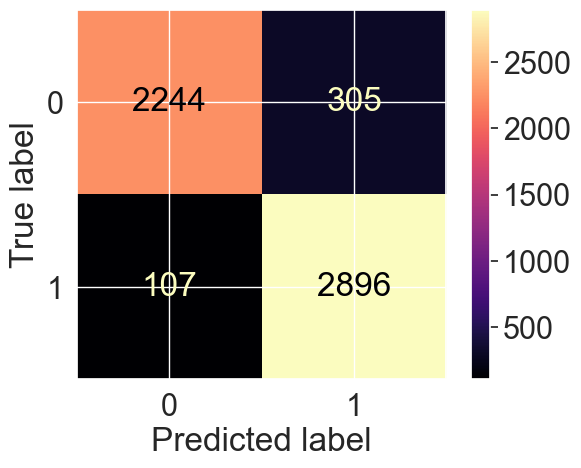

In [64]:
# Evaluasi model of test set
y_pred_seq2 = new_seqModel.predict(test_pipe)
y_pred_seq2 = np.where(y_pred_seq2 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_seq2))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_seq2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='magma')
plt.show()

Data dengan pemodelan improvement sequential API menunjukkan performa metric 

|precision | recall | f1-score |

| 90%      | 96%    | 93%      |

dari nilai diatas, model dikatakan sangat baik dan masuk dalam kategori `Good-fit` setelah dilakukannya improvement. Dengan metrics recall mencapai angka tertinggi dari ke-4 model lainnya sebesar 96% dan waktu train yang sedikit lebih lama sebelum dilakukannya improvement.

### 7.4. Improved Functional API

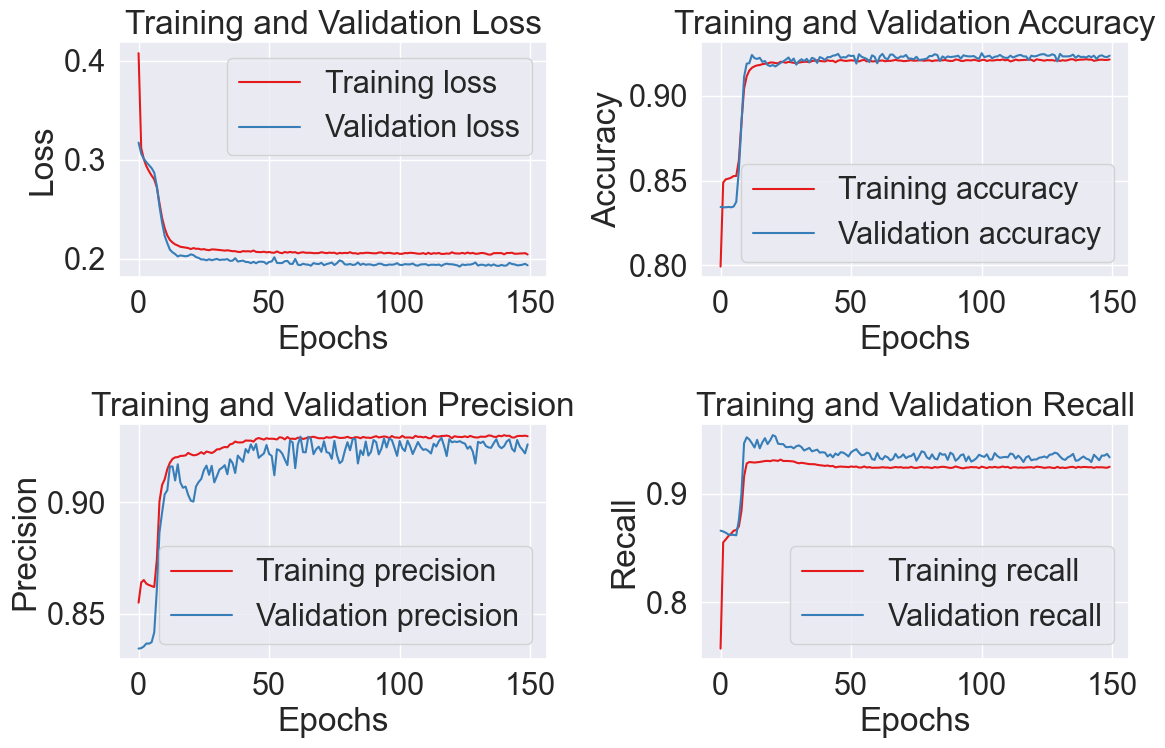

In [65]:
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
cmap= plt.get_cmap('Set1')

# Plot Training and Validation Loss
axs[0, 0].plot(history_new_func_df['loss'], color=cmap(0), label='Training loss')
axs[0, 0].plot(history_new_func_df['val_loss'], color=cmap(1), label='Validation loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend(loc="best")

# Plot Training and Validation Accuracy
axs[0, 1].plot(history_new_func_df['binary_accuracy'], color=cmap(0), label='Training accuracy')
axs[0, 1].plot(history_new_func_df['val_binary_accuracy'], color=cmap(1), label='Validation accuracy')
axs[0, 1].set_title('Training and Validation Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Plot Training and Validation Precision
axs[1, 0].plot(history_new_func_df['precision_2'], color=cmap(0), label='Training precision')
axs[1, 0].plot(history_new_func_df['val_precision_2'], color=cmap(1), label='Validation precision')
axs[1, 0].set_title('Training and Validation Precision')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend()

# Plot Training and Validation Recall
axs[1, 1].plot(history_new_func_df['recall_2'], color=cmap(0), label='Training recall')
axs[1, 1].plot(history_new_func_df['val_recall_2'], color=cmap(1), label='Validation recall')
axs[1, 1].set_title('Training and Validation Recall')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend()

plt.tight_layout()  
plt.show()


12/12 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2549
           1       0.93      0.93      0.93      3003

    accuracy                           0.92      5552
   macro avg       0.92      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552



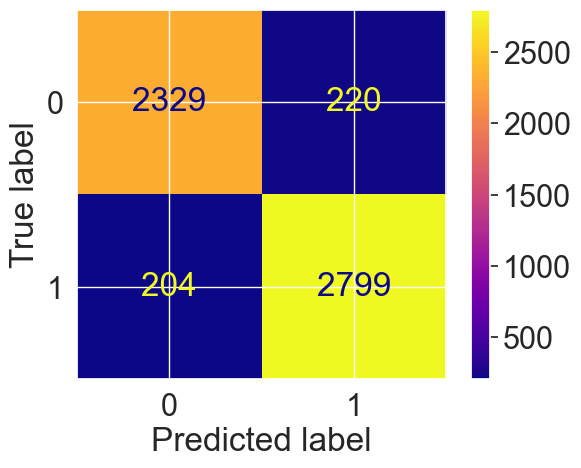

In [66]:
# Evaluasi model  of test set
y_pred_func_2 = new_funcModel.predict(test_pipe)
y_pred_func_2 = np.where(y_pred_func_2 >=0.5, 1, 0)

print(classification_report(y_test, y_pred_func_2))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_func_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='plasma')
plt.show()

Data dengan pemodelan improvement sequential API menunjukkan performa metric 

|precision | recall | f1-score |

| 93%      | 93%    | 93%      |

dari nilai diatas, model dikatakan sangat baik dan masuk dalam kategori `Good-fit` setelah dilakukannya improvement. Dibandingkan dengan sequential sebelum improvement, model ini mengalami kenaikan yang baik dari ketiga metric pengukuran. Namun, untuk model yang dipilih adalah improvement sequential API dikarenakan nilai False Negatif yang cukup kecil yang sangat baik untuk mengurangi kesalahan prediksi churn customer. 

## `8. Model Saving`

In [79]:
# Save model
with open('full_pipeline.pkl', 'wb') as file_1:
  pickle.dump(full_pipeline, file_1)

new_seqModel.trainable = True
new_seqModel.summary()

# Save ANN Model
new_seqModel.save('best_model.h5')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 248       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


## `9. Kesimpulan`

Kesimpulan dibagi menjadi 2 bagian, yaitu Exploratory dan Model Analysis.

`Exploratory`
- Distribusi churn risk score cenderung terbagi secara merata antara nilai-nilainya.

- Rata-rata transaksi customer yang tidak churn lebih tinggi daripada customer yang churn.

- Mayoritas customer churn berada pada kategori membership "No Membership" dan "Basic Membership".

- Alasan customer churn umumnya terkait dengan feedback seperti "No reason specified", "Poor Customer Service", "Poor Product Quality", "Poor Website", dan "Too many ads".

- Korelasi antara beberapa fitur seperti "past_complaint", "complaint_status", "point_in_wallet", "avg_frequency_login_days", "avg_transaction_value", dan "membership_category" perlu diuji lebih lanjut untuk analisis selanjutnya.


`Model Analysis`
- Pada pembaruan model sequential, dilakukan penggunaan Dropout dan optimizer Nadam untuk meningkatkan performa model terutama pada metrik Recall.

- Dropout digunakan untuk secara acak mematikan beberapa unit (neuron) pada lapisan sebelumnya selama proses pelatihan. Hal ini dapat membantu meningkatkan generalisasi model dan mengurangi overfitting.

- Optimizer Nadam menggabungkan metode momentum untuk mempercepat konvergensi dengan algoritma Adam yang efisien dalam menyesuaikan tingkat pembelajaran secara adaptif. Dengan menggunakan Nadam, optimasi model dapat dilakukan dengan lebih cepat dan efisien, serta memungkinkan model mencapai titik optimum yang lebih baik.

- Berdasarkan data pemodelan sequential API yang diperbarui, diperoleh hasil metrik sebagai berikut:

    | Precision | Recall | f1-Score |
    |----------|----------|----------|
    | 90 %   | 96 %   | 93 %   |



    Dengan nilai metrik di atas, model dikategorikan sangat baik dan termasuk dalam kategori "Good-fit" setelah dilakukan pembaruan. Metrik Recall mencapai nilai tertinggi di antara keempat model lainnya, yaitu sebesar 96%, meskipun waktu pelatihan sedikit lebih lama sebelum dilakukan pembaruan.

- Berdasarkan data pemodelan sequential API yang diperbarui, diperoleh hasil metrik sebagai berikut:

     | Precision | Recall | f1-Score |
    |----------|----------|----------|
    | 93 %   | 93 %   | 93 %   |
    
    Dengan nilai metrik di atas, model dikategorikan sangat baik dan termasuk dalam kategori "Good-fit" setelah dilakukan pembaruan. Dibandingkan dengan model sequential sebelum pembaruan, model ini mengalami peningkatan yang signifikan pada ketiga metrik pengukuran. Namun, model sequential API yang telah diperbarui dipilih karena memiliki nilai False Negatif yang lebih rendah, yang sangat baik untuk mengurangi kesalahan prediksi pelanggan yang churn.